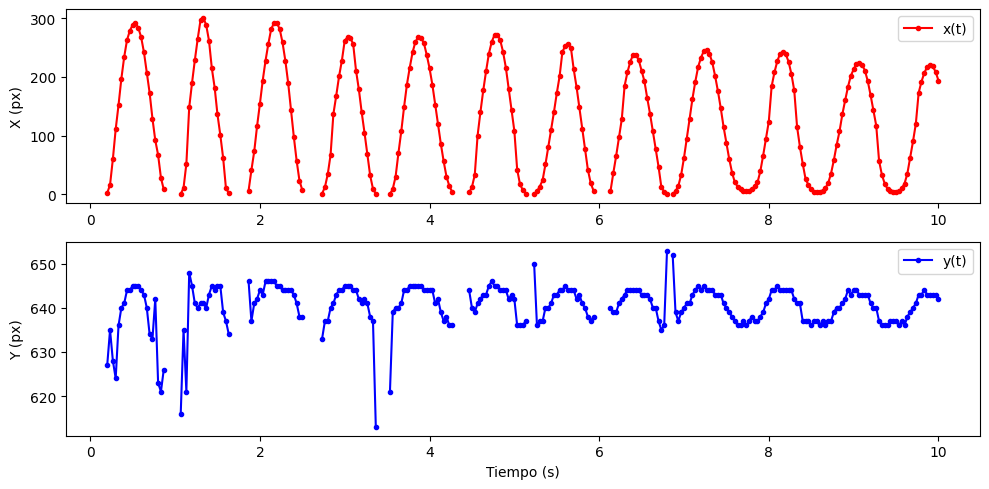

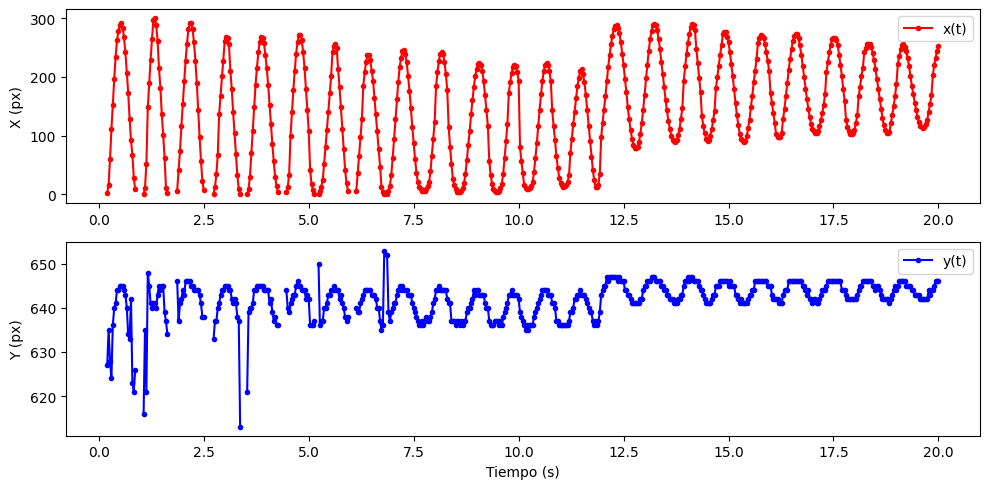

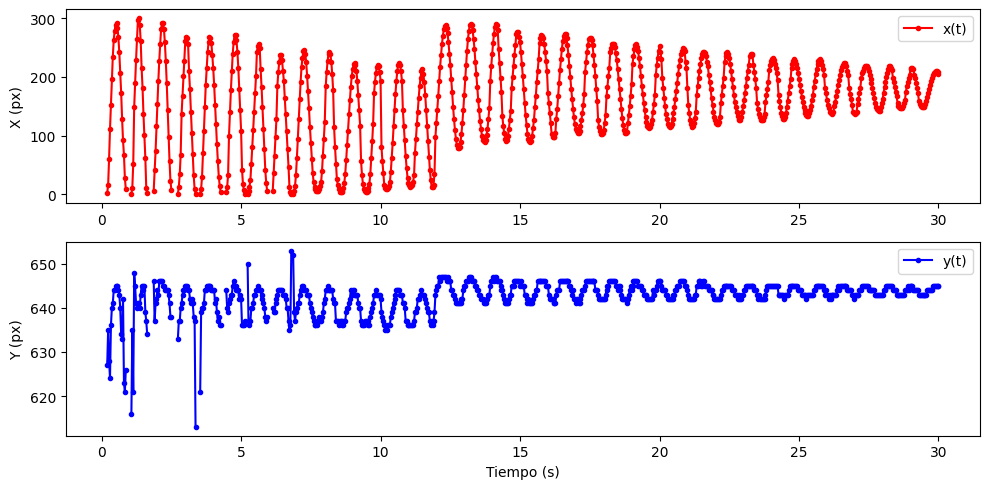

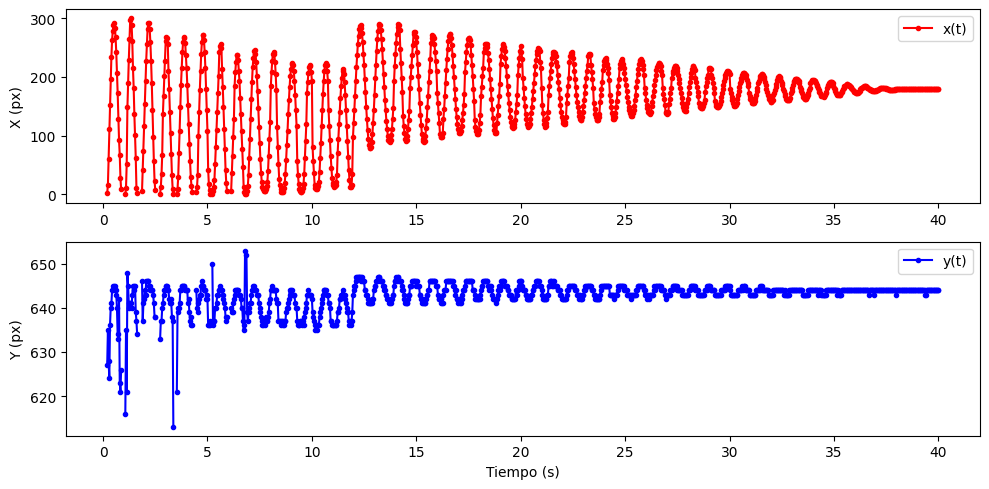

KeyboardInterrupt: 

: 

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

# Inicializar cámara
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("No se pudo acceder a la cámara")

# Parámetros
fps = 30
datos = []
frame_count = 0
start_time = time()

# Crear ventana
cv2.namedWindow("Blanco detectado", cv2.WINDOW_NORMAL)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Tiempo relativo (en segundos)
    timestamp = frame_count / fps

    # Convertir a HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Filtrar rojos (dos rangos)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)

    # Suavizar para evitar ruido
    #mask = cv2.GaussianBlur(mask, (5, 5), 0)

    # Calcular momentos para encontrar el centro de masa
    M = cv2.moments(mask)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = np.nan, np.nan  # Nada detectado

    # Dibujar centro de masa (si se detecta)
    if not np.isnan(cx):
        cv2.circle(frame, (cx, cy), 5, (0, 255, 0), -1)

    # Guardar en lista
    datos.append([timestamp, cx, cy])

    # Mostrar imagen procesada
    cv2.imshow("Blanco detectado", mask)

    # Cada 10 segundos: graficar
    if int(timestamp) % 10 == 0 and frame_count != 0 and frame_count % (10 * fps) == 0:
        df = pd.DataFrame(datos, columns=["tiempo_s", "x", "y"])
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(df["tiempo_s"], df["x"], 'r.-', label="x(t)")
        plt.ylabel("X (px)")
        plt.legend()
        plt.subplot(2, 1, 2)
        plt.plot(df["tiempo_s"], df["y"], 'b.-', label="y(t)")
        plt.ylabel("Y (px)")
        plt.xlabel("Tiempo (s)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    frame_count += 1

    # Salir con 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Guardar CSV
df_final = pd.DataFrame(datos, columns=["tiempo_s", "x", "y"])
df_final.to_csv("trayectoria_punto_rojo.csv", index=False)

# Liberar recursos
cap.release()
cv2.destroyAllWindows()
print("Datos guardados en trayectoria_punto_rojo.csv ✅")

In [ ]:
# Guardar CSV
df_final = pd.DataFrame(datos, columns=["tiempo_s", "x", "y"])
df_final.to_csv("trayectoria_punto_rojo.csv", index=False)

: 